In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from pandas.io.json import json_normalize
import warnings
warnings.filterwarnings('ignore')
import requests
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
from collections import defaultdict

Text(0.5, 0, 'Longitude')

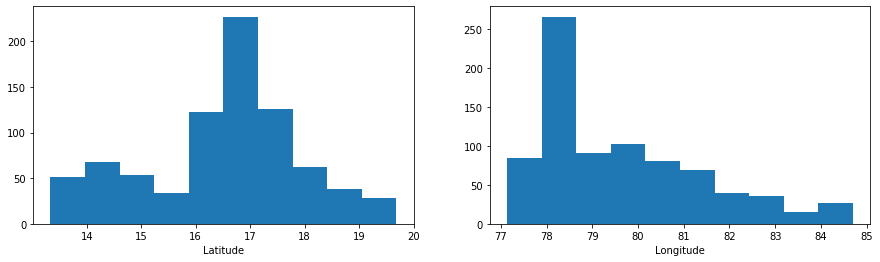

In [51]:
india_data=pd.read_csv('India_location.csv')

india_data.drop('accuracy',axis=1,inplace=True)
india_data.dropna(inplace=True)

india_data.columns=['pin','place','state','latitude','longitude']
india_data.reset_index(inplace=True)

andhra_data=india_data[india_data['state']=='Andhra Pradesh']

f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,4))
ax1.hist(andhra_data.latitude)
ax1.set_xlabel('Latitude')
ax2.hist(andhra_data.longitude)
ax2.set_xlabel('Longitude')

#### The following code is for Preprocessing the Hyderabad data copied from Wikipedia and to fetch the Latitude and Longitude Values useing geopy

In [82]:
'''
hyd=pd.read_csv('Hyderabad_Neighborhoods.csv')

hyd['Neighborhood']=hyd['Neighborhood'].str.lower().str.strip()

hyd.groupby('section').count()

longitude = [] 
latitude = [] 

def findGeocode(city):
    #print(city)
    try: 
        geolocator = Nominatim(user_agent="your_app_name")  
        return geolocator.geocode(city) 
    except GeocoderTimedOut: 
        return findGeocode(city)


y=hyd['Neighborhood'].apply(findGeocode)

nones=[]
for i,each in enumerate(y) :
    if each==None :
        nones.append(i)
        continue
    latitude.append(each.latitude)
    longitude.append(each.longitude)

hyd.drop(nones,inplace=True)

hyd['latitude']=latitude
hyd['longitude']=longitude

hyd.reset_index(inplace=True)
hyd=hyd.drop('index',axis=1)

hyd.to_csv('Hyderabad_Location_Data.csv')

'''

In [164]:
hyd=hyd[(hyd.latitude>17.2) & (hyd.latitude<17.6) & (hyd.longitude>78.2) & (hyd.longitude<78.7)]
hyd.to_csv('Hyderabad_Location_Data.csv')


  Neighborhood  section   latitude  longitude
0     ameerpet  Central  17.437501  78.448251
1     begumpet  Central  17.444020  78.462482
2     sr nagar  Central  17.445231  78.444912
3   punjagutta  Central  17.426957  78.452393
4    balkampet  Central  17.446923  78.450451


Text(0.5, 0, 'Longitude')

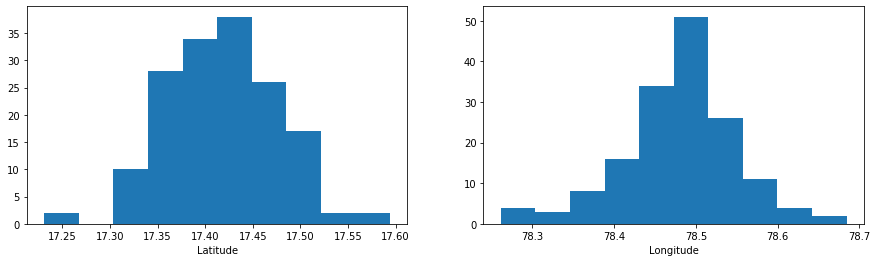

In [166]:
hyd=pd.read_csv('Hyderabad_Location_Data.csv')
print(hyd.head())

f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,4))
ax1.hist(hyd.latitude)
ax1.set_xlabel('Latitude')
ax2.hist(hyd.longitude)
ax2.set_xlabel('Longitude')

In [167]:
hyd_map=folium.Map([hyd_lat, hyd_lon],zoom_start=10)

folium.CircleMarker([hyd_lat, hyd_lon],popup='Hyderabad',color='white',fill_color='black',fill_opacity=5,parse_html=True).add_to(hyd_map)

for lat,lon,pop in hyd[['latitude','longitude','Neighborhood']].values :
    folium.CircleMarker([lat,lon],radius=4,popup=str(pop)+'\n {},{}'.format(str(lat),str(lon)),fill_color='red',fill_opacity=0.5,parse_html=True).add_to(hyd_map)

hyd_map

In [168]:
hyd[hyd.Neighborhood=='miyapur']

,Neighborhood,section,latitude,longitude
88,miyapur,North Western,17.498161,78.356763


In [169]:
#FourSquare related details
fs_id='DO4R3AM02RL5PUSD3RTCGQDQK2T1TYPL25QKYGTAXN2GJIJU'
fs_secret='R4XHNDHR0G21AZX50R5ERF3HVTKTEPPTLQ4KVPONQSPZWR3Y'
version = '20200801'
limit = 50
radius=500

lat,lon=17.498161, 78.356763

url="https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".\
format(fs_id,fs_secret,version,hyd_lat,hyd_lon,radius,limit)
result=requests.get(url).json()

In [170]:
result

{'meta': {'code': 200, 'requestId': '5fb11f1bebf7ed05265858e2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hyderabad',
  'headerFullLocation': 'Hyderabad',
  'headerLocationGranularity': 'city',
  'totalResults': 11,
  'suggestedBounds': {'ne': {'lat': 17.507161009000008,
    'lng': 78.36618205671452},
   'sw': {'lat': 17.48916099099999, 'lng': 78.34734394328548}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ea7c8c37ee5c76518b648c9',
       'name': 'KS Bakers',
       'location': {'lat': 17.49656207074,
        'lng': 78.35878073127974,
        'labeledLatLngs': [{'label': 'display',
          'lat': 17.49656207074,
          'lng': 78.35878073127974}],
        'distance

In [206]:
result['response']['groups'][0]['items'][0]['venue']

{'id': '4ea7c8c37ee5c76518b648c9',
 'name': 'KS Bakers',
 'location': {'lat': 17.49656207074,
  'lng': 78.35878073127974,
  'labeledLatLngs': [{'label': 'display',
    'lat': 17.49656207074,
    'lng': 78.35878073127974}],
  'distance': 278,
  'cc': 'IN',
  'city': 'Hyderabad',
  'state': 'Telangana',
  'country': 'India',
  'formattedAddress': ['Hyderabad', 'Telangana', 'India']},
 'categories': [{'id': '4bf58dd8d48988d16a941735',
   'name': 'Bakery',
   'pluralName': 'Bakeries',
   'shortName': 'Bakery',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
    'suffix': '.png'},
   'primary': True}],
 'photos': {'count': 0, 'groups': []}}

In [296]:
fs_id='DO4R3AM02RL5PUSD3RTCGQDQK2T1TYPL25QKYGTAXN2GJIJU'
fs_secret='R4XHNDHR0G21AZX50R5ERF3HVTKTEPPTLQ4KVPONQSPZWR3Y'
version = '20200801'
limit = 50
radius=2000

venue_dict=defaultdict(pd.DataFrame)

In [297]:
def getVenueData(row) :
    
    hood=row['Neighborhood']
    hood_section=row['section']
    hood_lat,hood_lon=row['latitude'], row['longitude']
    
    url="https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".\
    format(fs_id,fs_secret,version,hood_lat,hood_lon,radius,limit)
    
    result=requests.get(url).json()
    
    result_len=len(result['response']['groups'][0]['items'])
    
    neighborhood,section,city,latitude,longitude,venue_id,venue_name,venue_lat,venue_lon,venue_cat_id,venue_cat_name=\
    [],[],[],[],[],[],[],[],[],[],[]
    for i in range(result_len) :
        neighborhood.append(hood)
        section.append(hood_section)
        #city.append(result['response']['groups'][0]['items'][i]['venue']['location']['city'])
        city.append('Hyderabad')
        latitude.append(hood_lat)
        longitude.append(hood_lon)
        venue_id.append(result['response']['groups'][0]['items'][i]['venue']['id'])
        venue_name.append(result['response']['groups'][0]['items'][i]['venue']['name'])
        venue_lat.append(result['response']['groups'][0]['items'][i]['venue']['location']['lat'])
        venue_lon.append(result['response']['groups'][0]['items'][i]['venue']['location']['lng'])
        venue_cat_id.append(result['response']['groups'][0]['items'][i]['venue']['categories'][0]['id'])
        venue_cat_name.append(result['response']['groups'][0]['items'][i]['venue']['categories'][0]['name'])
        
    venue_dict[hood]=pd.DataFrame(list(zip(neighborhood,section,city,latitude,longitude,venue_id,venue_name,venue_lat,venue_lon,venue_cat_id,venue_cat_name)))
    venue_dict[hood].columns=['neighborhood','section','city','latitude','longitude',\
                                      'venue_id','venue_name','venue_lat','venue_lon','venue_cat_id','venue_cat_name']

In [ ]:
for each in hyd.iterrows() :
    print(each[0])
    getVenueData(each[1])

In [ ]:
#If the fetch fails somewhere run this by changing the start index
for each in hyd.iloc[132:].iterrows() :
    print(each[0])
    getVenueData(each[1])

In [301]:
len(venue_dict.keys())

159

In [302]:
final=venue_dict['ameerpet'].values

for each_key in list(venue_dict.keys())[1:] :
    if len(venue_dict[each_key])==0 :
        continue
    final=np.r_[final,venue_dict[each_key].values]
    
hyd_loc_df=pd.DataFrame(final,columns=venue_dict['ameerpet'].columns)

In [303]:
hyd_loc_df.shape

(3625, 11)

In [304]:
hyd_loc_df

,neighborhood,section,city,latitude,longitude,venue_id,venue_name,venue_lat,venue_lon,venue_cat_id,venue_cat_name
0,ameerpet,Central,Hyderabad,17.4375,78.4483,5050c114e4b0694f643d178e,Mekong,17.4372,78.4543,4bf58dd8d48988d145941735,Chinese Restaurant
1,ameerpet,Central,Hyderabad,17.4375,78.4483,4bac7d4df964a5205df73ae3,10 Downing Street,17.4359,78.4574,4bf58dd8d48988d11b941735,Pub
2,ameerpet,Central,Hyderabad,17.4375,78.4483,4c543cc0728920a13abe6a82,Kebabs & Kurries,17.4324,78.4576,4bf58dd8d48988d10f941735,Indian Restaurant
3,ameerpet,Central,Hyderabad,17.4375,78.4483,4e1b27cbd22ddd4af9ea6366,ITC Kakatiya,17.4325,78.4574,4bf58dd8d48988d1fa931735,Hotel
4,ameerpet,Central,Hyderabad,17.4375,78.4483,4c20d4ac8082d13aae41f82a,Kakatiya Deluxe Mess,17.4334,78.4471,4bf58dd8d48988d147941735,Diner
...,...,...,...,...,...,...,...,...,...,...,...
3620,umdanagar,South Western,Hyderabad,17.2634,78.3932,4f8d4357e4b079c5bb18684a,Bawarchi,17.2609,78.3865,4bf58dd8d48988d10f941735,Indian Restaurant
3621,umdanagar,South Western,Hyderabad,17.2634,78.3932,4fd16e34e4b0d4fb73deefcc,UMDANAGAR,17.2637,78.3883,4bf58dd8d48988d129951735,Train Station
3622,umdanagar,South Western,Hyderabad,17.2634,78.3932,5710f823498e1c30bc3b9e14,Karachi Bakery,17.2608,78.3865,4bf58dd8d48988d16a941735,Bakery
3623,umdanagar,South Western,Hyderabad,17.2634,78.3932,506e4db0e4b052d9944b9bb0,Swagath Grand Hotel,17.2601,78.3855,4bf58dd8d48988d10f941735,Indian Restaurant


In [305]:
hyd_loc_df[hyd_loc_df['neighborhood']=='miyapur']

,neighborhood,section,city,latitude,longitude,venue_id,venue_name,venue_lat,venue_lon,venue_cat_id,venue_cat_name
2856,miyapur,North Western,Hyderabad,17.4982,78.3568,4efb2d6661af4546019b9719,Domino's Pizza,17.5031,78.3555,4bf58dd8d48988d1ca941735,Pizza Place
2857,miyapur,North Western,Hyderabad,17.4982,78.3568,4ea7c8c37ee5c76518b648c9,KS Bakers,17.4966,78.3588,4bf58dd8d48988d16a941735,Bakery
2858,miyapur,North Western,Hyderabad,17.4982,78.3568,531b139c498e3035a48bd410,KFC,17.4954,78.3558,4bf58dd8d48988d16e941735,Fast Food Restaurant
2859,miyapur,North Western,Hyderabad,17.4982,78.3568,52721115498ed6bed55886af,Domino's Pizza,17.4952,78.3409,4bf58dd8d48988d1ca941735,Pizza Place
2860,miyapur,North Western,Hyderabad,17.4982,78.3568,50bdc209e4b0e37b6f288b7c,Hotel Akshaya,17.4965,78.359,4bf58dd8d48988d10f941735,Indian Restaurant
2861,miyapur,North Western,Hyderabad,17.4982,78.3568,4c8c7f61f0ce236aad0d19ef,Spencers Daily,17.4961,78.3588,4bf58dd8d48988d1f6941735,Department Store
2862,miyapur,North Western,Hyderabad,17.4982,78.3568,4e8d64f5e5fa18aa8d1daad4,Dosa plaza,17.5031,78.3555,4bf58dd8d48988d10f941735,Indian Restaurant
2863,miyapur,North Western,Hyderabad,17.4982,78.3568,56ac5f2a498e4f517f9298da,Allwyn Junction,17.4941,78.3512,52f2ab2ebcbc57f1066b8b4c,Intersection
2864,miyapur,North Western,Hyderabad,17.4982,78.3568,4ec68a5b775bf65c02495829,Bommarillu Restaurant,17.4962,78.3634,4bf58dd8d48988d142941735,Asian Restaurant
2865,miyapur,North Western,Hyderabad,17.4982,78.3568,4c39d9a218e72d7f64cc1af5,Athidhi Restaurant,17.494,78.3524,4bf58dd8d48988d10f941735,Indian Restaurant


In [306]:
hyd_loc_df.to_csv('Hyderabad_Loaction_2000radius.csv')